<a href="https://colab.research.google.com/github/ingenziart/sokrab/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [5]:
duplicate=df.duplicated().sum()
print(duplicate)

0


In [7]:
y=df['Species']
x=df.drop(['Species'],axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y=le.fit_transform(y)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [13]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [ ]:
#plot features
feature_names=x.columns


In [77]:
feature_names=x.columns
num_features=len(feature_names)
num_classes=len(np.unique(y))
X_np=x.to_numpy()
for feature_index in range (num_features):
  feature_name=feature_names[feature_index]
  x_vals=np.linspace(X_np[: ,feature_index].min(),X_np[:,feature_index].max(),200)
  plt.figure(figsize=(10,8))
  plt.show()






<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

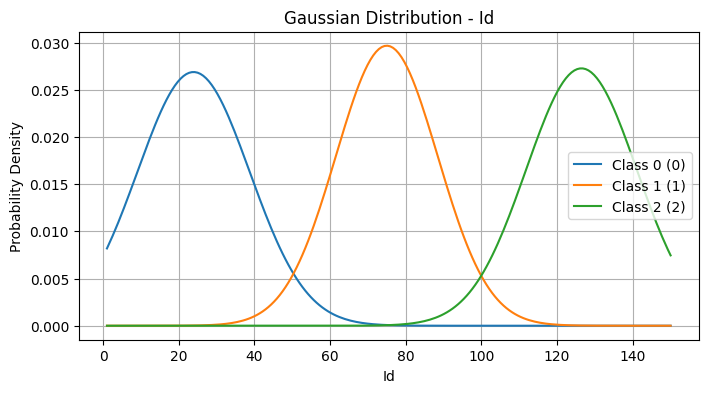

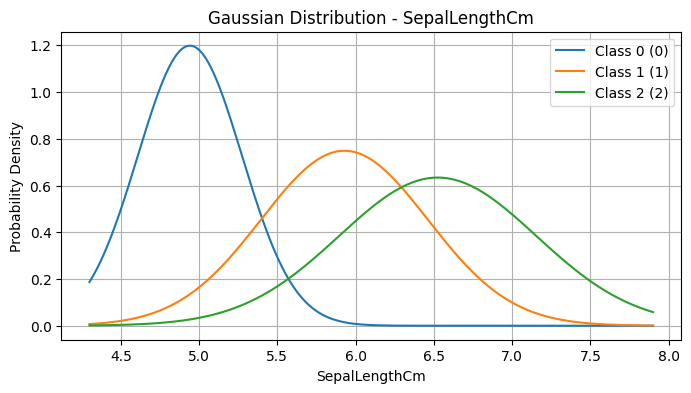

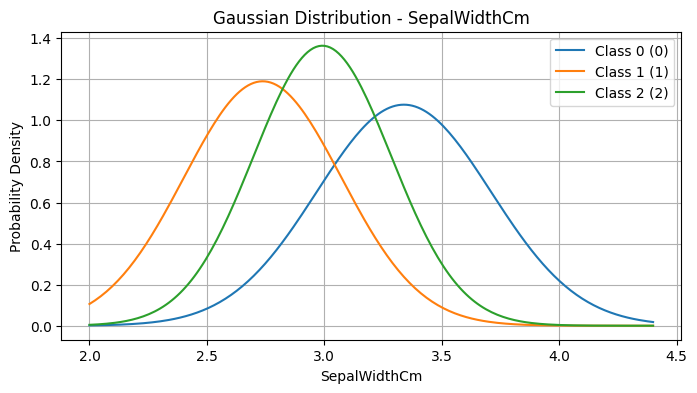

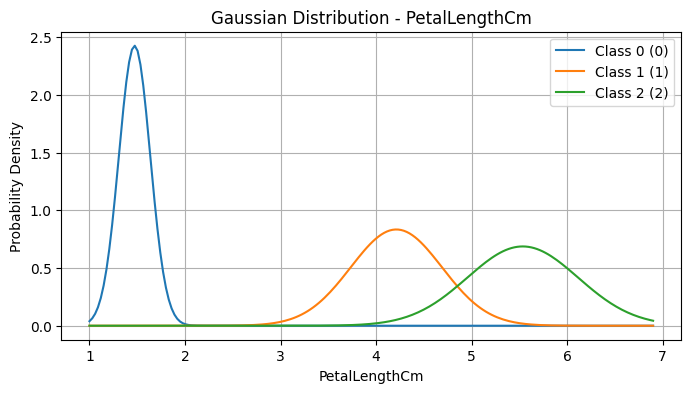

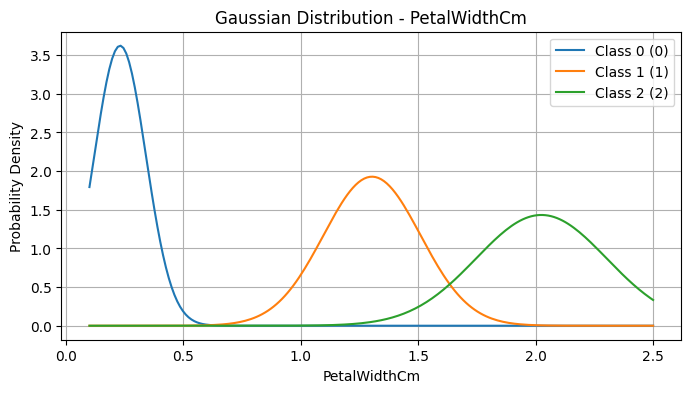

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

feature_names = x.columns
num_features = len(feature_names)
num_classes = len(np.unique(y))
X_np = x.to_numpy()

for feature_index in range(num_features):
    feature_name = feature_names[feature_index]
    x_vals = np.linspace(X_np[:, feature_index].min(), X_np[:, feature_index].max(), 200)

    plt.figure(figsize=(8, 4))

    for cls in range(num_classes):
        mean = gnb.theta_[cls, feature_index]
        std = np.sqrt(gnb.var_[cls, feature_index])
        y_vals = norm.pdf(x_vals, mean, std)
        plt.plot(x_vals, y_vals, label=f"Class {cls} ({le.inverse_transform([cls])[0]})")

    plt.title(f"Gaussian Distribution - {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)
    plt.show()
